In [5]:
import pandas as pd 
import env
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import os

import acquire as acq
import prepare as prep

In [9]:
SQL_query = '''select * from passengers'''
filename = "titanic.csv"
directory = '/Users/divante/codeup-data-science/classification_exercises'
url= f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/titanic_db'

df = acq.get_titanic_data(SQL_query, directory, url)   
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [19]:
SQL_query = '''select * from measurements
join species using(species_id);
;'''    

filename = "titanic.csv"
directory = '/Users/divante/codeup-data-science/classification_exercises'

iris_df = acq.get_iris_data(SQL_query, directory, url)
iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
SQL_query = '''
select *
from customers
join contract_types using(contract_type_id)
join internet_service_types using(internet_service_type_id)
join payment_types using(payment_type_id)
;
'''    
telco_churn_df = acq.get_telco_data()
telco_churn_df

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [6]:
# from pydataset import data


# # In a jupyter notebook, classification_exercises.ipynb, use a python module 
# # (pydata or seaborn datasets) containing datasets as a source from the iris data. 
# # Create a pandas dataframe, df_iris, from this data.
# df = data('iris')

# # print the first 3 rows
# df.head(3)
# # print the number of rows and columns (shape)
# df.shape

# # print the column names
# df.columns

# # print the data type of each column
# df.info()


# # print the summary statistics for each of the numeric variables
# df.describe()


# from pydataset import data
# # Read the data from this google sheet into a dataframe, df_google.

# df = pd.read_clipboard()



# # print the first 3 rows
# df.head()
# # print the number of rows and columns
# df.shape

# # print the column names
# df.columns
# # print the data type of each column
# df.info()
# # print the summary statistics for each of the numeric variables
# df.describe

# # print the unique values for each of your categorical variables
# print(df.Embarked.value_counts())
# print(df.Sex.value_counts())
# print(df.Cabin.value_counts())
# print(df.Ticket.value_counts())





# # Download the previous exercise's file into an excel (File → Download → Microsoft Excel). 
# # Read the downloaded file into a dataframe named df_excel.
# df = pd.read_excel('train.xlsx')

# # assign the first 100 rows to a new dataframe, df_excel_sample
# df_excel_sample = df.head()
# # print the number of rows of your original dataframe
# df.shape[0]

# # print the first 5 column names
# df.columns[0:5]
# # print the column names that have a data type of object
# df.columns[[3,4,8,10,11]]


# # compute the range for each of the numeric variables.
# range_of_PassengerId = df.PassengerId.max() - df.PassengerId.min()
# range_of_Survived = df.Survived.max() - df.Survived.min()
# range_of_Pclass = df.Pclass.max() - df.Pclass.min()
# range_of_Age = df.Age.max() - df.Age.min()
# range_of_SibSp = df.SibSp.max() - df.SibSp.min()
# range_of_Parch = df.Parch.max() - df.Parch.min()
# range_of_Fare = df.Fare.max() - df.Fare.min()


# print(df.columns)
# df.info()
# print(range_of_Fare)


# # Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, 
# # now it's time to add caching to them. To do this, edit the beginning of the function to check 
# # for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. 
# # If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, 
# # then write the dataframe to a .csv file with the appropriate name.
# os.getcwd()

In [7]:
# iris_df = iris_df.drop(columns= ['species_id', 'measurement_id'])
# iris_df
# iris_df = iris_df.rename(columns={"species_name": "species"})
# iris_df

# dummy_df = pd.get_dummies(iris_df[['species']])
# iris_df = pd.concat([iris_df,dummy_df], axis=1)
# iris_df
# iris_df = acquire.get_iris_data()

# iris_df

# def prep_iris(iris_df):
#     iris_df = iris_df.rename(columns={"species_name": "species"})
#     dummy_df = pd.get_dummies(iris_df[['species']])
#     iris_df = pd.concat([iris_df,dummy_df], axis=1)
#     return iris_df

# new_iris_df = prep_iris(iris_df)
# new_iris_df

# titanic = acquire.get_titanic_data() 
# titanic = titanic.drop(columns=['passenger_id','class','embarked','deck'])
# titanic
# titanic.select_dtypes('object')
# dummy = pd.get_dummies(titanic[['sex', 'embark_town']], drop_first=True)
# titanic = pd.concat([titanic, dummy], axis=1)
# titanic

# the_df = acquire.get_titanic_data()

# def prep_titanic(raw_titanic_df):
#     titanic = acquire.get_titanic_data() 
#     titanic = titanic.drop(columns=['passenger_id','class','embarked','deck'])
#     dummy = pd.get_dummies(titanic[['sex', 'embark_town']], drop_first=True)
#     titanic = pd.concat([titanic, dummy], axis=1)
#     titanic = titanic.drop(columns=['sex', 'embark_town'])
#     return titanic
    

# the_answer = prep_titanic(the_df)
# the_answer

# data = acquire.get_telco_data()
# data
# # Drop any unnecessary, unhelpful, or duplicated columns. 
# # This could mean dropping foreign key columns but keeping 
# # the corresponding string values, for example.
# data = data.drop(columns = ['payment_type_id', 'internet_service_type_id',
#                      'contract_type_id','Unnamed: 0'])
# data

# # Encode the categorical columns. Create dummy variables of 
# # the categorical columns and concatenate them onto the dataframe.
# the_columns = data.select_dtypes('object').columns

# the_columns = the_columns.drop(['customer_id', 'total_charges'])


# # with pd.option_context('display.max_rows', None,
# #                        'display.max_columns', None,
# #                        'display.precision', 3,
# #                        ):
# #     print(data.head())
    
# dummy = pd.get_dummies(data, columns = the_columns, drop_first=True)
# dummy

# df = acquire.get_telco_data()


# def prep_telco(data):
#     data = data.drop(columns = ['payment_type_id', 'internet_service_type_id',
#                      'contract_type_id','Unnamed: 0'])
#     the_columns = data.select_dtypes('object').columns

#     the_columns = the_columns.drop(['customer_id', 'total_charges'])
#     dummy = pd.get_dummies(data, columns = the_columns, drop_first=True)
#     return dummy 

# the_answer = prep_telco(df)
# the_answer
# # Split your data

# # Write a function to split your data into train, 
# # test and validate datasets.


# def split_data(df, target):
#     '''
#     Takes in the titanic dataframe and return train, validate, test subset dataframes
#     '''
    
    
#     train, test = train_test_split(df,
#                                    test_size=.2, 
#                                    random_state=123, 
#                                    stratify=df[target]
#                                    )
#     train, validate = train_test_split(train, 
#                                        test_size=.25, 
#                                        random_state=123, 
#                                        stratify=train[target]
#                                        )
    
#     return train, validate, test


# # Add this function to prepare.py.

# # Run the function in your notebook on the Iris dataset, 
# # returning 3 datasets, train_iris, 
# # validate_iris and test_iris.

# df = acquire.get_iris_data()

# train, validate, test  = split_data(df, target = 'species_name')
# print(len(test) / len(df))
# print(len(train) / len(df))
# print(len(validate) / len(df))


# # Run the function on the Titanic dataset, returning 3 datasets, 
# # train_titanic, validate_titanic and test_titanic.




# df = acquire.get_titanic_data()

# # print(df.survived.value_counts(dropna=False))
# # imputer = SimpleImputer(strategy = 'most_frequent')
# # imputer.fit(df[['survived']])
# # imputer.feature_names_in_
# # imputer.statistics_
# # df[['survived']]  = imputer.transform(df[['survived']])

# train, validate, test  = split_data(df, target = 'survived')
# print(len(test) / len(df))
# print(len(train) / len(df))
# print(len(validate) / len(df))
# # Run the function on the Telco dataset, returning 3 datasets, 
# # train_telco, validate_telco and test_telco.
# df = acquire.get_telco_data()

# train, validate, test  = split_data(df, target = 'churn')
# print(len(test) / len(df))
# print(len(train) / len(df))
# print(len(validate) / len(df))

NameError: name 'iris_df' is not defined

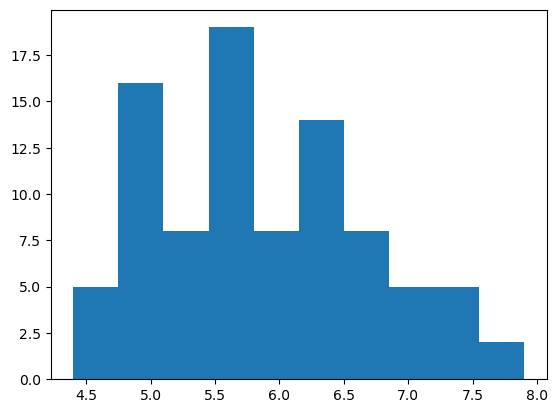

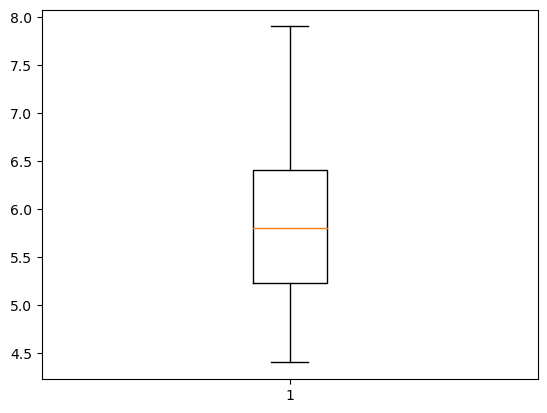

sepal_length
count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


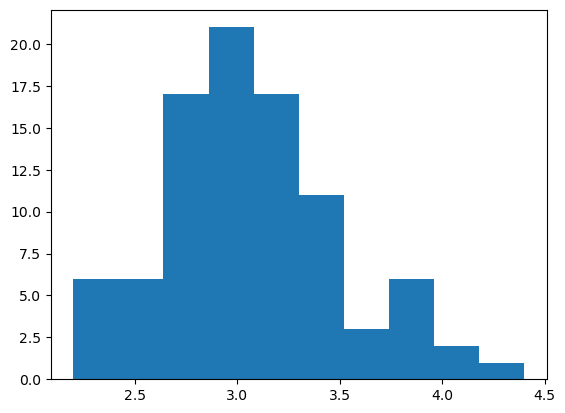

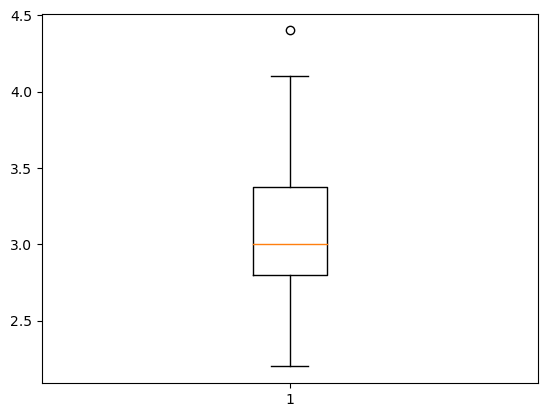

sepal_width
count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64


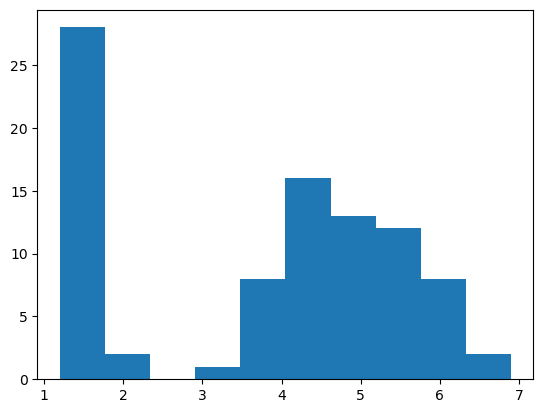

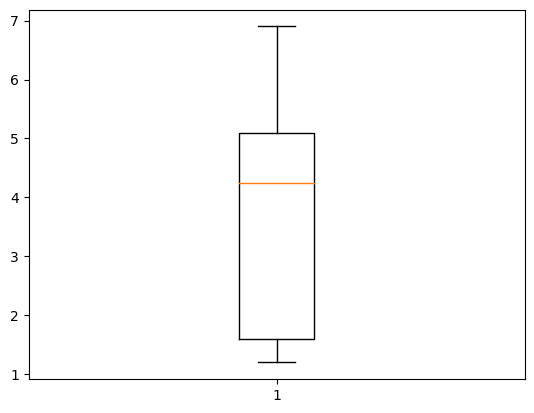

petal_length
count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


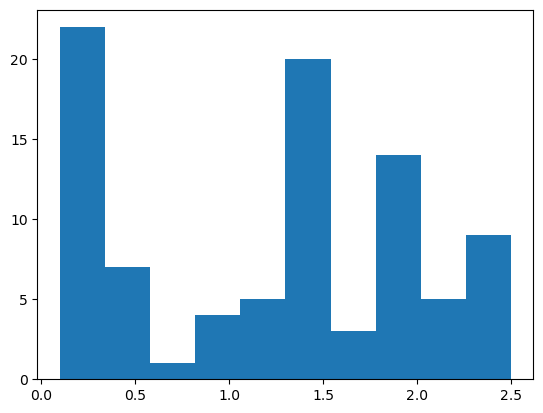

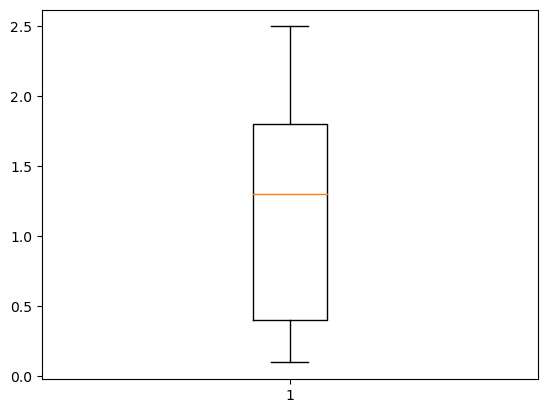

petal_width
count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


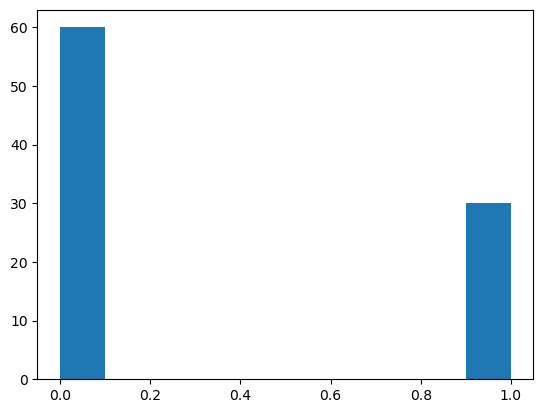

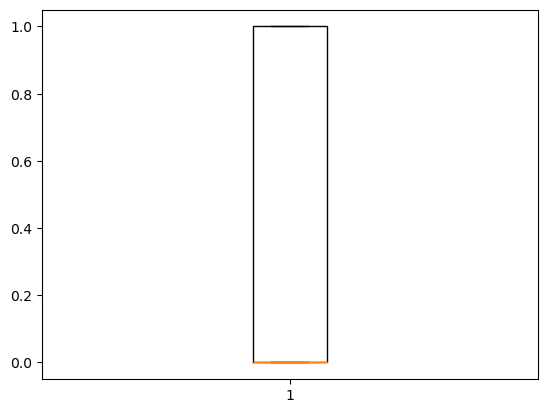

species_setosa
count    90.000000
mean      0.333333
std       0.474045
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: species_setosa, dtype: float64


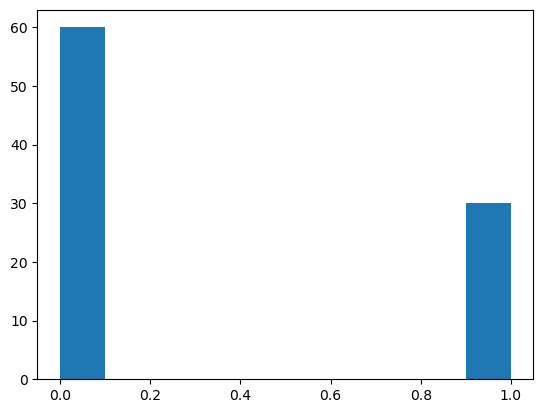

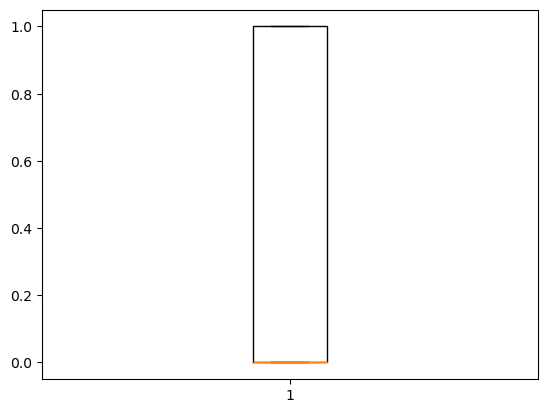

species_versicolor
count    90.000000
mean      0.333333
std       0.474045
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: species_versicolor, dtype: float64


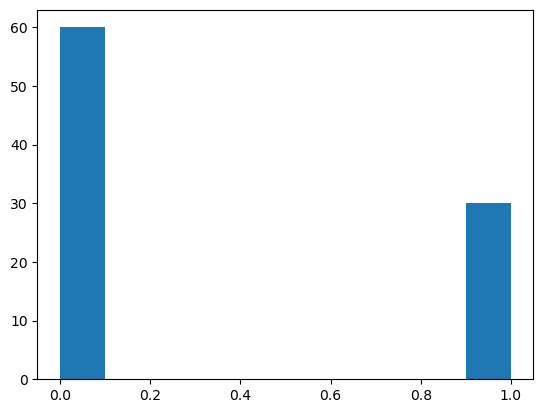

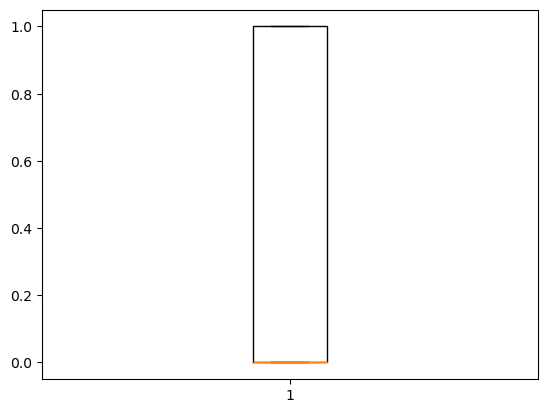

species_virginica
count    90.000000
mean      0.333333
std       0.474045
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: species_virginica, dtype: float64


In [6]:

# Acquire, prepare & split your data.

# Univariate Stats

# For each measurement type (quantitative variable): 
# create a histogram, boxplot, & compute descriptive
# statistics (using .describe()).

iris_db = acq.get_iris_data()
iris_db = prep.prep_iris(iris_db)
train, validate, test = prep.split_data(iris_db, 'species')

the_list = train.select_dtypes(exclude = 'object').columns
for i in range(len(the_list)):
    plt.hist(train[the_list[i]])
    plt.show()
    plt.boxplot(train[the_list[i]]) 
    plt.show()
    print(the_list[i])
    print(train[the_list[i]].describe())



versicolor:  sepal_length
(5.53, 5.74]     7
(5.74, 5.95]     5
(5.32, 5.53]     4
(5.95, 6.16]     4
(6.37, 6.58]     3
(6.16, 6.37]     2
(6.79, 7.0]      2
(4.898, 5.11]    1
(5.11, 5.32]     1
(6.58, 6.79]     1
Name: sepal_length, dtype: int64


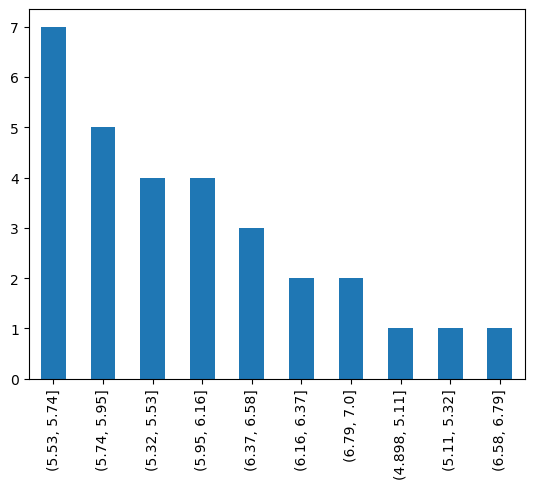



versicolor:  sepal_width
(2.63, 2.74]     5
(2.96, 3.07]     5
(2.299, 2.41]    4
(2.85, 2.96]     4
(2.74, 2.85]     3
(3.18, 3.29]     3
(2.41, 2.52]     2
(2.52, 2.63]     2
(3.07, 3.18]     1
(3.29, 3.4]      1
Name: sepal_width, dtype: int64


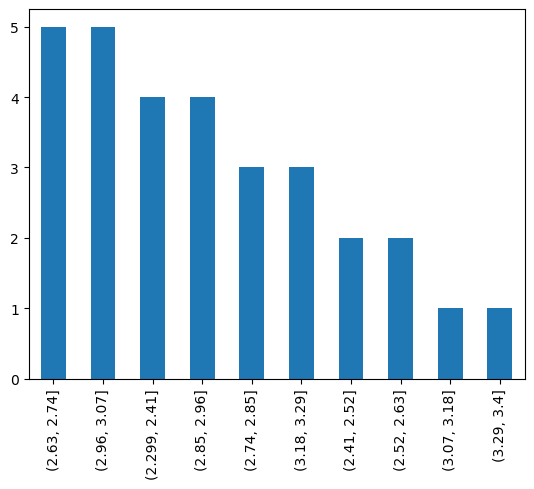



versicolor:  petal_length
(3.84, 4.02]     6
(4.2, 4.38]      6
(4.38, 4.56]     5
(4.56, 4.74]     5
(4.02, 4.2]      2
(4.74, 4.92]     2
(3.298, 3.48]    1
(3.48, 3.66]     1
(3.66, 3.84]     1
(4.92, 5.1]      1
Name: petal_length, dtype: int64


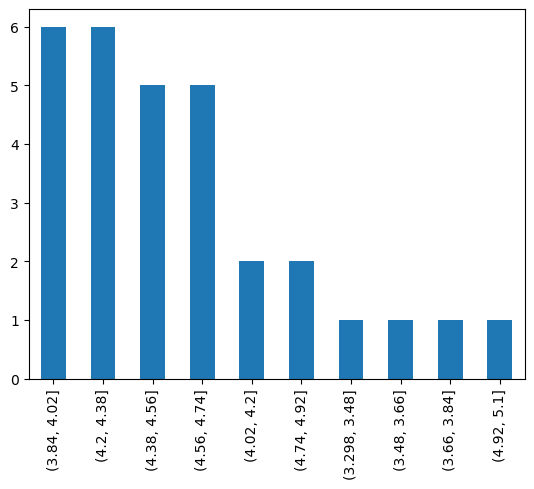



versicolor:  petal_width
(1.24, 1.32]     10
(1.48, 1.56]      5
(0.999, 1.08]     4
(1.16, 1.24]      4
(1.32, 1.4]       3
(1.56, 1.64]      2
(1.08, 1.16]      1
(1.72, 1.8]       1
(1.4, 1.48]       0
(1.64, 1.72]      0
Name: petal_width, dtype: int64


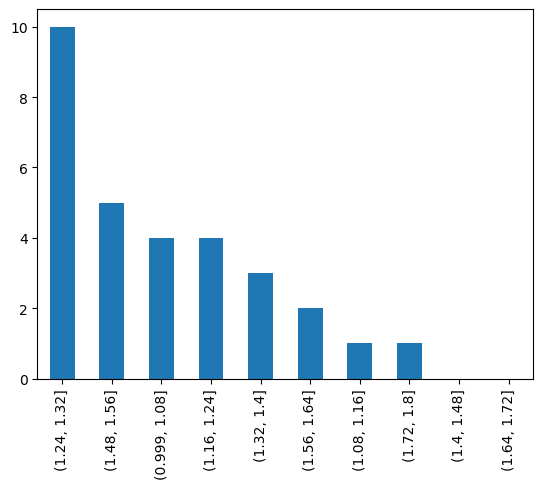



virginica:  sepal_length
(6.22, 6.43]     9
(5.798, 6.01]    4
(6.64, 6.85]     4
(6.85, 7.06]     3
(7.06, 7.27]     3
(6.43, 6.64]     2
(7.27, 7.48]     2
(7.69, 7.9]      2
(6.01, 6.22]     1
(7.48, 7.69]     0
Name: sepal_length, dtype: int64


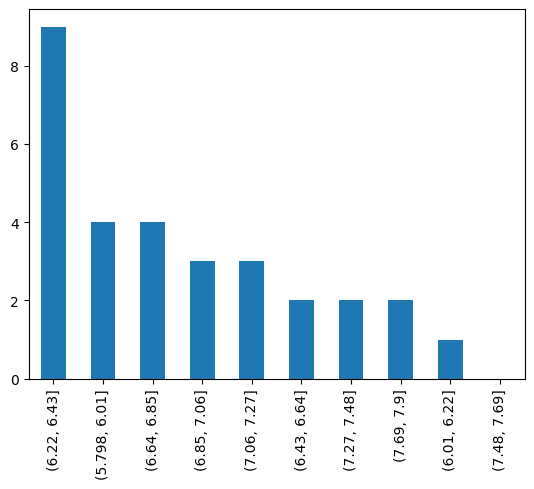



virginica:  sepal_width
(2.68, 2.84]     9
(2.84, 3.0]      8
(3.0, 3.16]      4
(3.16, 3.32]     4
(2.198, 2.36]    1
(2.36, 2.52]     1
(2.52, 2.68]     1
(3.48, 3.64]     1
(3.64, 3.8]      1
(3.32, 3.48]     0
Name: sepal_width, dtype: int64


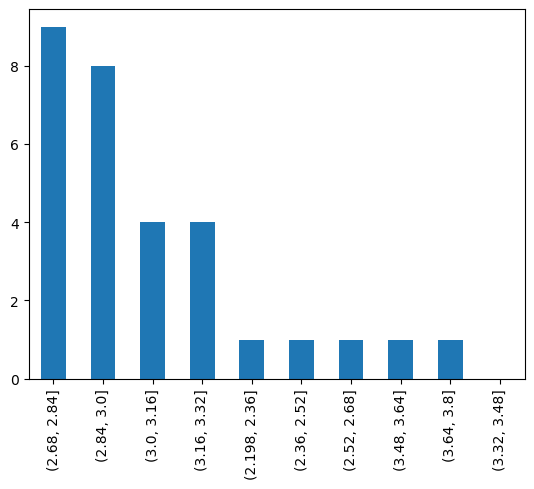



virginica:  petal_length
(5.01, 5.22]     7
(5.43, 5.64]     6
(5.64, 5.85]     4
(4.798, 5.01]    3
(5.22, 5.43]     3
(5.85, 6.06]     2
(6.06, 6.27]     2
(6.27, 6.48]     2
(6.69, 6.9]      1
(6.48, 6.69]     0
Name: petal_length, dtype: int64


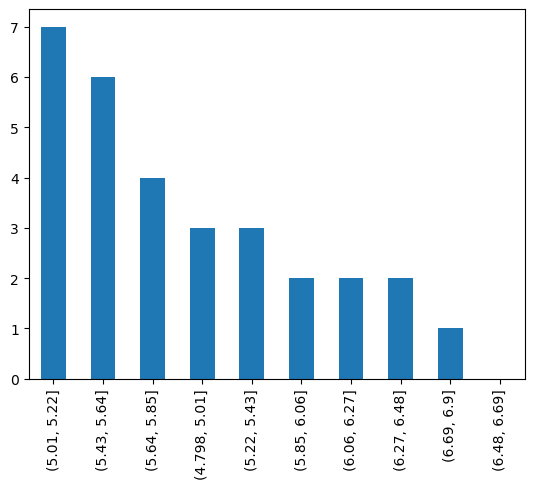



virginica:  petal_width
(1.7, 1.8]      8
(2.2, 2.3]      5
(1.499, 1.6]    3
(1.8, 1.9]      3
(2.0, 2.1]      3
(1.9, 2.0]      2
(2.1, 2.2]      2
(2.3, 2.4]      2
(2.4, 2.5]      2
(1.6, 1.7]      0
Name: petal_width, dtype: int64


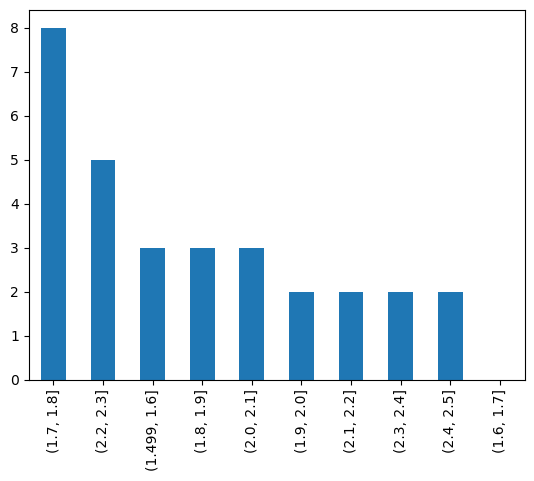



setosa:  sepal_length
(4.96, 5.1]      10
(5.38, 5.52]      5
(4.68, 4.82]      4
(5.66, 5.8]       3
(4.399, 4.54]     2
(4.54, 4.68]      2
(4.82, 4.96]      2
(5.1, 5.24]       1
(5.24, 5.38]      1
(5.52, 5.66]      0
Name: sepal_length, dtype: int64


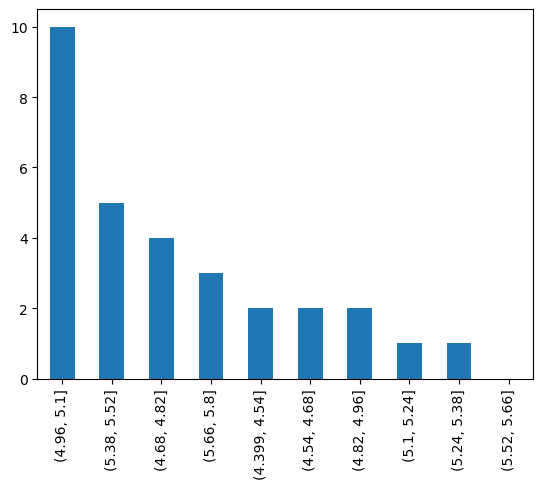



setosa:  sepal_width
(3.35, 3.56]     10
(2.93, 3.14]      5
(3.77, 3.98]      5
(3.14, 3.35]      3
(3.56, 3.77]      2
(3.98, 4.19]      2
(2.298, 2.51]     1
(2.72, 2.93]      1
(4.19, 4.4]       1
(2.51, 2.72]      0
Name: sepal_width, dtype: int64


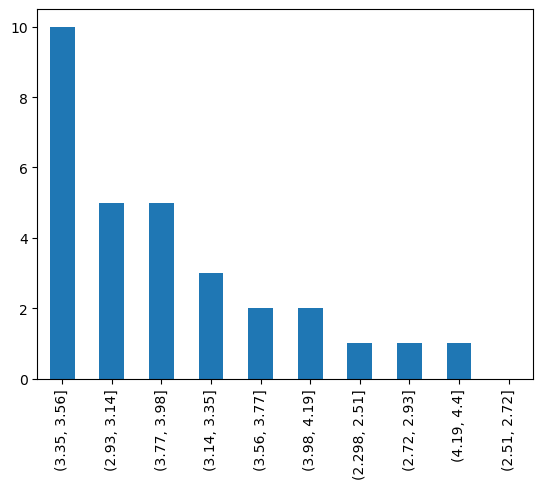



setosa:  petal_length
(1.48, 1.55]     7
(1.55, 1.62]     6
(1.34, 1.41]     5
(1.27, 1.34]     4
(1.69, 1.76]     4
(1.199, 1.27]    2
(1.83, 1.9]      2
(1.41, 1.48]     0
(1.62, 1.69]     0
(1.76, 1.83]     0
Name: petal_length, dtype: int64


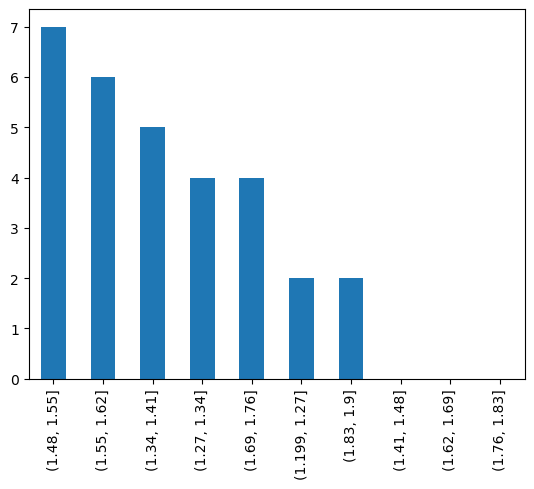



setosa:  petal_width
(0.15, 0.2]       15
(0.35, 0.4]        6
(0.25, 0.3]        4
(0.0995, 0.15]     3
(0.45, 0.5]        1
(0.55, 0.6]        1
(0.2, 0.25]        0
(0.3, 0.35]        0
(0.4, 0.45]        0
(0.5, 0.55]        0
Name: petal_width, dtype: int64


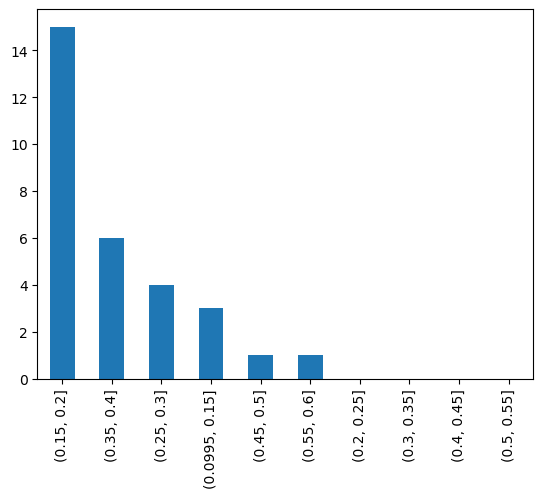

In [70]:
# For each species (categorical variable): create a 
# frequency table and a bar plot of those frequencies.




the_list = train.select_dtypes(exclude = 'object').columns
    
versicolor = train[train.species == 'versicolor']
versicolor = versicolor.drop(columns = ['species_virginica', 'species_versicolor', 'species_setosa'])


virginica = train[train.species == 'virginica']
virginica = virginica.drop(columns = ['species_virginica', 'species_versicolor', 'species_setosa'])


setosa = train[train.species == 'setosa']
setosa = setosa.drop(columns = ['species_virginica', 'species_versicolor', 'species_setosa'])


# for i in range(len(the_list)):
#     versicolor_data = pd.cut(versicolor, 5)

the_list = versicolor.select_dtypes(exclude = 'object').columns

for i in range(len(the_list)):
    print('versicolor: ', the_list[i])
    versicolor_data = pd.cut(versicolor[the_list[i]], 10)
    
    print(versicolor_data.value_counts())
    the_data = versicolor_data.value_counts()
    the_data.plot.bar()
    plt.show()
    print('\n')
    
    
the_list = virginica.select_dtypes(exclude = 'object').columns    
for i in range(len(the_list)):
    print('virginica: ', the_list[i])
    virginica_data = pd.cut(virginica[the_list[i]], 10)
    
    print(virginica_data.value_counts())
    the_data = virginica_data.value_counts()
    the_data.plot.bar()
    plt.show()
    print('\n')

    
the_list = setosa.select_dtypes(exclude = 'object').columns    
for i in range(len(the_list)):
    print('setosa: ', the_list[i])
    setosa_data = pd.cut(setosa[the_list[i]], 10)
    
    print(setosa_data.value_counts())
    the_data = setosa_data.value_counts()
    the_data.plot.bar()
    plt.show()
    print('\n')
    



In [41]:
# Document takeaways & any actions.
# versicolor:  petal_width
# (1.24, 1.32]     10

# I found that most of teh petal widths of the versicolor flower species
# are within the bin (1.24, 1.32]


# virginica:  sepal_length
# (6.22, 6.43]     9

# most sepal_length of the virginica species have a length between 
# (6.22, 6.43] 


# setosa:  sepal_length
# (4.96, 5.1]      10
# most of the setosa sepal_lengths fall in the (4.96, 5.1] bin
 
# setosa:  sepal_width
# (3.35, 3.56]     10
#  most of the setosa sepal_width fall in the (3.35, 3.56] bin
 
# setosa:  petal_width
# (0.15, 0.2]       15
# most of the setosa petal_width fall in the (0.15, 0.2] bin

In [150]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
70,5.9,3.2,4.8,1.8,versicolor,0,1,0
123,6.3,2.7,4.9,1.8,virginica,0,0,1
87,6.3,2.3,4.4,1.3,versicolor,0,1,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
15,5.7,4.4,1.5,0.4,setosa,1,0,0


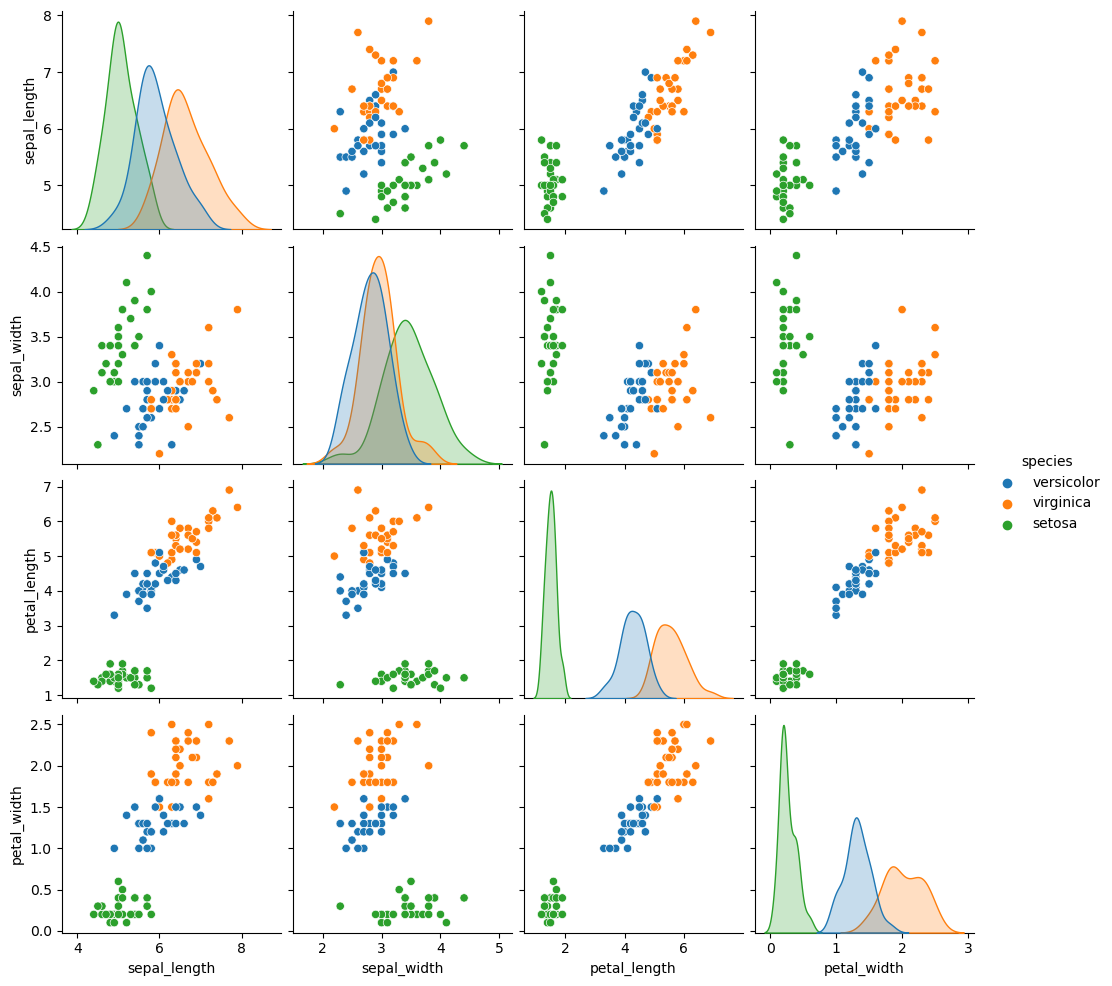

In [125]:
# Bivariate Stats

# Visualize each measurement type (y-axis) with the 
# species variable (x-axis) using barplots, adding a 
# horizontal line showing the overall mean of the metric (y-axis).




data = train.drop(columns = ['species_virginica', 'species_versicolor', 'species_setosa'])
sns.pairplot(data, hue ="species")

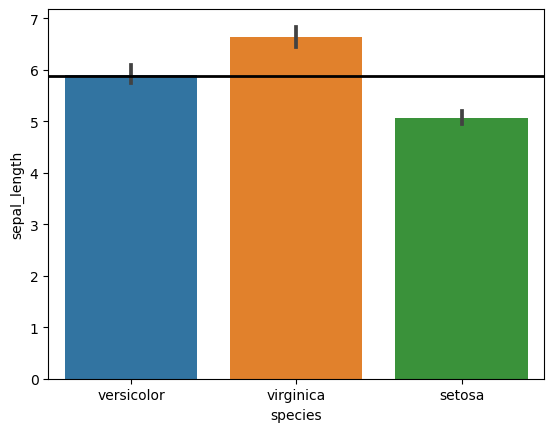

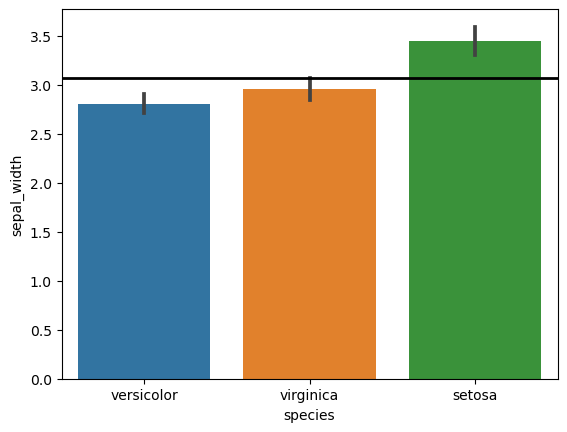

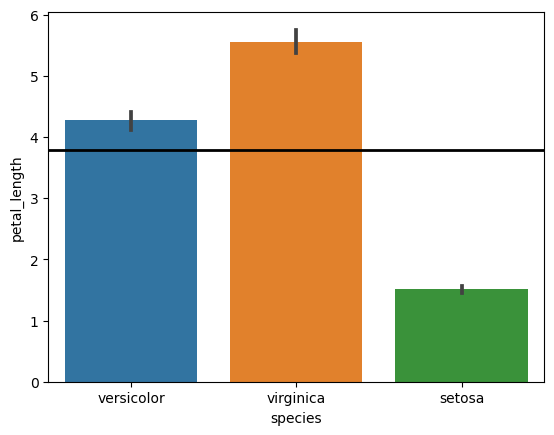

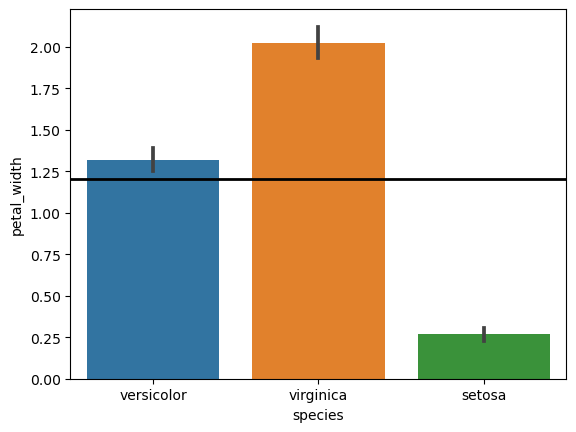

In [149]:
# data = data.drop(columns=['species'])
# sns.barplot()
the_columns = data.columns
for i in range(len(data.columns)-1):
    
    the_plot = sns.barplot(data = data, x = data.species, y = data.columns[i])
    the_plot.axhline(data[the_columns[i]].mean(), color='k', lw=2)
    plt.show()
        